In [147]:
from Almanac.Data import get_weather_data
from Almanac.Data import get_frost_dates
from Almanac.Data import binarize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from copy import deepcopy

%matplotlib inline

In [72]:
df = get_weather_data("Chicago, IL", "2000-01-01", "2022-12-31")

In [5]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [9]:
df_W = df.resample("W").min()

In [11]:
df_W.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1193.000000,1201.000000,0.0,1201.000000,184.0
mean,6.808659,2.575937,10.248543,0.001332,6.147377,95.836547,9.515820,NaN,1009.479684,0.0
std,11.500897,11.153441,11.697535,0.023767,32.009151,84.209237,2.676966,NaN,5.505591,0.0
min,-26.500000,-30.000000,-22.800000,0.000000,0.000000,0.000000,2.500000,NaN,989.400000,0.0
25%,-1.900000,-5.600000,0.600000,0.000000,0.000000,23.000000,7.600000,NaN,1006.200000,0.0
50%,6.900000,2.800000,10.000000,0.000000,0.000000,53.000000,9.300000,NaN,1010.000000,0.0
75%,17.600000,13.300000,21.100000,0.000000,0.000000,180.000000,11.200000,NaN,1012.800000,0.0
max,26.300000,23.300000,31.700000,0.500000,406.000000,349.000000,20.100000,NaN,1029.100000,0.0


In [117]:
day_sin = sin_transformer(365).fit_transform(df.index.day_of_year)
day_cos = cos_transformer(365).fit_transform(df.index.day_of_year)

In [118]:
df["day_sin"] = day_sin
df["day_cos"] = day_cos

In [27]:
df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,day_sin,day_cos
time,,,,,,,,,,,,
2000-01-01,5.8,1.7,11.1,0.0,0.0,203.0,13.0,NaN,1014.8,NaN,0.017213,0.999852
2000-01-02,9.6,2.8,16.1,0.0,0.0,NaN,23.7,NaN,1006.1,NaN,0.034422,0.999407
2000-01-03,3.4,0.6,5.0,4.3,0.0,45.0,21.7,NaN,1009.4,NaN,0.051620,0.998667
2000-01-04,-2.2,-4.4,1.1,0.3,0.0,292.0,21.6,NaN,1013.5,NaN,0.068802,0.997630
2000-01-05,-6.7,-8.9,-2.2,0.0,0.0,200.0,18.0,NaN,1025.4,NaN,0.085965,0.996298


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
gbr = GradientBoostingRegressor(n_estimators=300, max_depth=5, warm_start=True)
rfr = RandomForestRegressor(n_estimators=300, warm_start=True)

In [33]:
daily_avg = []

df_big = get_weather_data("Chicago, IL", "1950-01-01", "2022-12-31")

for day in range(365):
    daily_avg.append(
        df_big[df_big.index.day_of_year == day + 1]["tmin"].mean()
    )

In [73]:
import calendar

In [75]:
calendar.isleap(2000)

True

In [108]:
t = []

In [109]:
for i, temp in enumerate(df["tmin"]):
    if calendar.isleap(df.index[i].year):
        t.append(0)
    else:
        if temp < daily_avg[df.index[i].day_of_year - 1]:
            t.append(1)
        else:
            t.append(0)

366
below
367
below
368
below
369
370
371
372
373
374
below
375
376
377
378
379
380
381
382
383
384
385
below
386
below
387
below
388
389
390
below
391
392
393
below
394
395
396
397
below
398
below
399
below
400
401
402
403
404
405
406
below
407
below
408
409
410
411
412
below
413
below
414
below
415
416
below
417
below
418
below
419
below
420
421
422
below
423
below
424
below
425
below
426
427
428
below
429
below
430
below
431
below
432
433
below
434
below
435
436
437
438
439
440
441
below
442
below
443
below
444
445
below
446
below
447
448
below
449
below
450
below
451
below
452
below
453
454
455
456
below
457
below
458
459
460
461
462
463
464
465
466
467
468
469
470
471
below
472
below
473
below
474
below
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
below
497
below
498
below
499
500
501
502
503
504
505
506
507
below
508
below
509
below
510
below
511
below
512
below
513
below
514
below
515
below
516
below
517
below
518
below
519
below
520
be

In [113]:
df["tmin_below_avg"] = t

In [71]:
# df.drop(index=df[(df["tmin"].index.month == 2) & (df.index.day==29)].index)

IndexError: list index out of range

In [119]:
df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,tmin_below_avg,day_sin,day_cos
time,,,,,,,,,,,,,
2000-01-01,5.8,1.7,11.1,0.0,0.0,203.0,13.0,NaN,1014.8,NaN,0,0.017213,0.999852
2000-01-02,9.6,2.8,16.1,0.0,0.0,NaN,23.7,NaN,1006.1,NaN,0,0.034422,0.999407
2000-01-03,3.4,0.6,5.0,4.3,0.0,45.0,21.7,NaN,1009.4,NaN,0,0.051620,0.998667
2000-01-04,-2.2,-4.4,1.1,0.3,0.0,292.0,21.6,NaN,1013.5,NaN,0,0.068802,0.997630
2000-01-05,-6.7,-8.9,-2.2,0.0,0.0,200.0,18.0,NaN,1025.4,NaN,0,0.085965,0.996298


In [122]:
rfr_model = rfr.fit(df[["day_sin", "day_cos"]], df["tmin"])

In [124]:
df_future = get_weather_data("Chicago, IL", "2023-01-01")

In [125]:
df_future

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-01-01,5.4,2.8,7.2,3.8,0.0,231.0,9.4,NaN,1014.3,NaN
2023-01-02,3.8,0.0,6.7,0.0,0.0,33.0,9.1,NaN,1017.1,NaN
2023-01-03,6.4,4.4,9.4,28.4,0.0,36.0,9.2,NaN,1004.3,NaN
2023-01-04,2.6,0.6,7.8,0.3,0.0,235.0,14.6,NaN,1007.3,NaN
2023-01-05,0.4,-0.6,1.1,0.8,0.0,245.0,16.2,NaN,1012.7,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-02,5.9,5.0,7.2,0.2,NaN,24.0,10.5,NaN,1014.6,NaN
2023-12-03,4.5,3.0,5.0,8.5,NaN,280.0,13.2,NaN,1008.6,NaN
2023-12-04,3.6,1.7,5.6,0.0,NaN,292.0,11.0,NaN,1015.6,NaN


In [126]:
day_sin = sin_transformer(365).fit_transform(df_future.index.day_of_year)
day_cos = cos_transformer(365).fit_transform(df_future.index.day_of_year)

In [127]:
df_future["day_sin"] = day_sin
df_future["day_cos"] = day_cos

In [128]:
df_future.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,day_sin,day_cos
time,,,,,,,,,,,,
2023-01-01,5.4,2.8,7.2,3.8,0.0,231.0,9.4,NaN,1014.3,NaN,0.017213,0.999852
2023-01-02,3.8,0.0,6.7,0.0,0.0,33.0,9.1,NaN,1017.1,NaN,0.034422,0.999407
2023-01-03,6.4,4.4,9.4,28.4,0.0,36.0,9.2,NaN,1004.3,NaN,0.051620,0.998667
2023-01-04,2.6,0.6,7.8,0.3,0.0,235.0,14.6,NaN,1007.3,NaN,0.068802,0.997630
2023-01-05,0.4,-0.6,1.1,0.8,0.0,245.0,16.2,NaN,1012.7,NaN,0.085965,0.996298


In [129]:
pred = rfr_model.predict(df_future[["day_sin", "day_cos"]])

Text(0.5, 1.0, 'Regression Model Predicitions vs Actual')

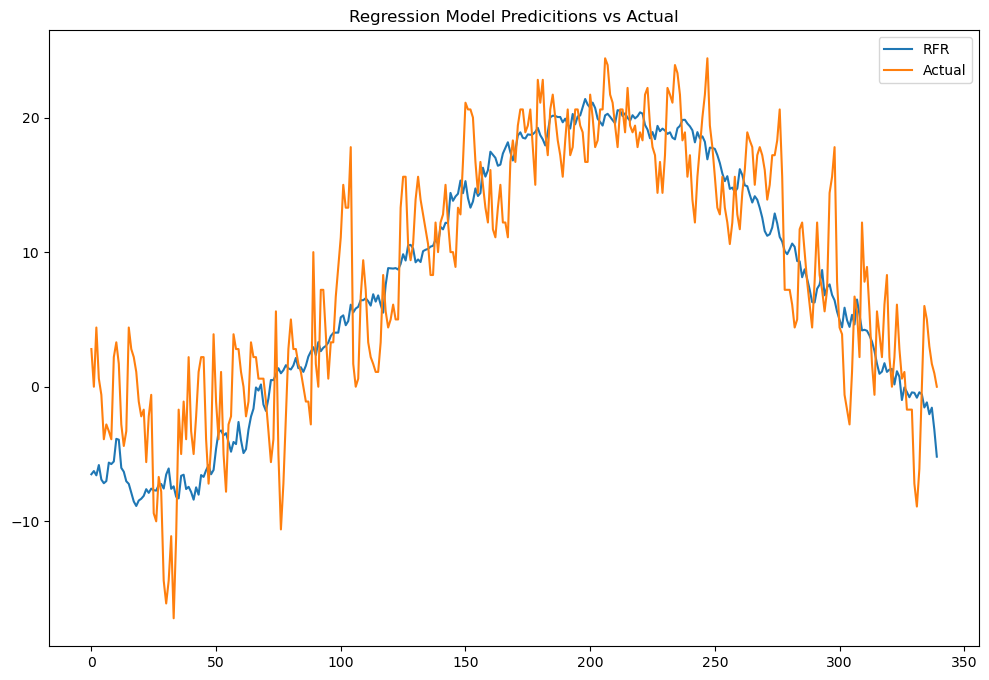

In [141]:
fig = plt.figure(figsize=(12, 8))
ax = plt.plot(pred)
ax = plt.plot(range(340), df_future["tmin"])
plt.legend(["RFR", "Actual"])
plt.title("Regression Model Predicitions vs Actual")

In [142]:
gbr_model = gbr.fit(df[["day_sin", "day_cos"]], df["tmin"])

In [143]:
gbr_pred = gbr.predict(df_future[["day_sin", "day_cos"]])

Text(0.5, 1.0, 'Regression Model Predicitions vs Actual')

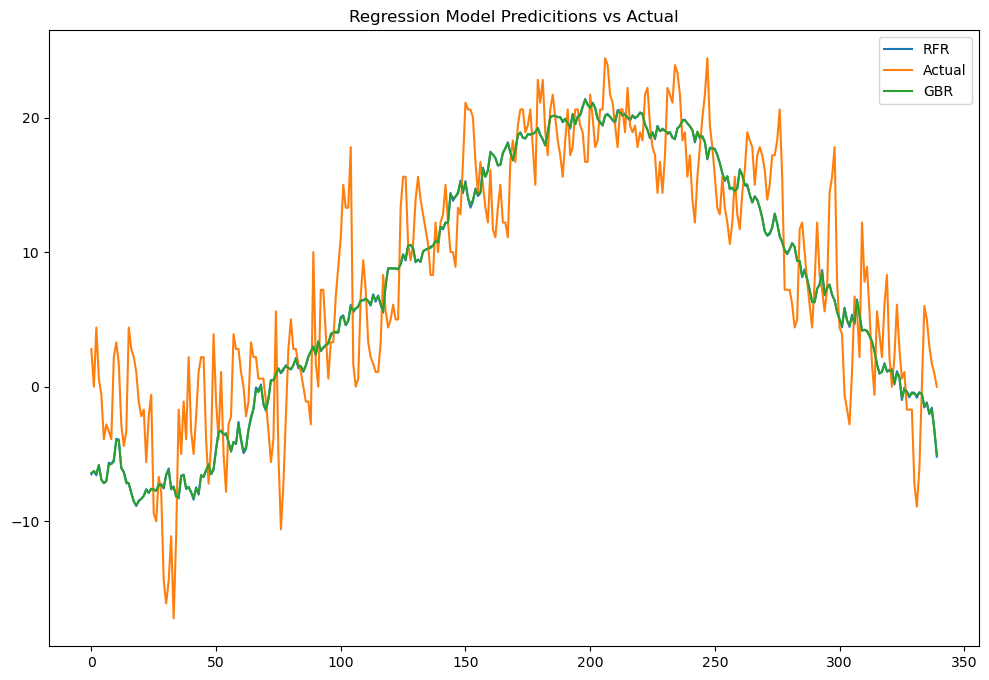

In [144]:
fig = plt.figure(figsize=(12, 8))
ax = plt.plot(pred)
ax = plt.plot(range(340), df_future["tmin"])
plt.plot(gbr_pred)
plt.legend(["RFR", "Actual", "GBR"])
plt.title("Regression Model Predicitions vs Actual")

In [148]:
df_rfr = deepcopy(df_future)

In [150]:
df_rfr["tmin"] = pred

In [152]:
get_frost_dates(df_rfr)

([Timestamp('2023-11-22 00:00:00')], [Timestamp('2023-03-13 00:00:00')])

In [153]:
df_gbr = deepcopy(df_future)

In [154]:
df_gbr["tmin"] = gbr_pred

In [155]:
get_frost_dates(df_gbr)

([Timestamp('2023-11-22 00:00:00')], [Timestamp('2023-03-13 00:00:00')])

2.5

In [1]:
pip list

Note: you may need to restart the kernel to use updated packages.
Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautifulsoup4 